In [2]:
from google.colab import files
uploaded = files.upload()


Saving customer_experience_data.csv to customer_experience_data.csv


In [3]:
import pandas as pd

df = pd.read_csv("customer_experience_data.csv")  # veya yüklediğin dosyanın ismini yaz
df.head()


,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1


In [11]:
print(df.isnull().sum())


Customer_ID                  0
Age                          0
Num_Interactions             0
Feedback_Score               0
Products_Purchased           0
Products_Viewed              0
Time_Spent_on_Site           0
Satisfaction_Score           0
Gender_Encoded               0
Location_Encoded             0
Retention_Status_Encoded     0
Gender_Male                  0
Location_Suburban            0
Location_Urban               0
Retention_Status_Retained    0
dtype: int64


In [12]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [8]:
print(df.columns)


Index(['Customer_ID', 'Age', 'Num_Interactions', 'Feedback_Score',
       'Products_Purchased', 'Products_Viewed', 'Time_Spent_on_Site',
       'Satisfaction_Score', 'Gender_Encoded', 'Location_Encoded',
       'Retention_Status_Encoded', 'Gender_Male', 'Location_Suburban',
       'Location_Urban', 'Retention_Status_Retained'],
      dtype='object')


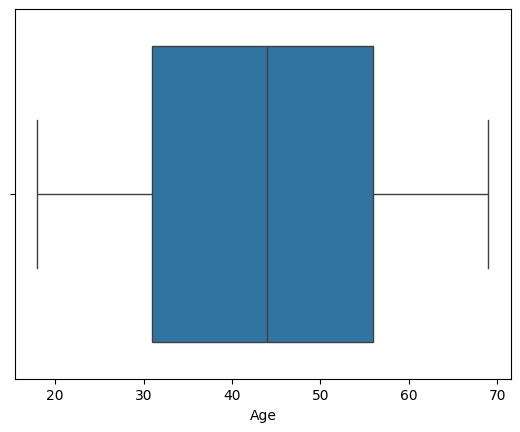

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Age'])
plt.show()

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))]


In [15]:
print(df.columns.tolist())


['Customer_ID', 'Age', 'Num_Interactions', 'Feedback_Score', 'Products_Purchased', 'Products_Viewed', 'Time_Spent_on_Site', 'Satisfaction_Score', 'Gender_Encoded', 'Location_Encoded', 'Retention_Status_Encoded', 'Gender_Male', 'Location_Suburban', 'Location_Urban', 'Retention_Status_Retained']


In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(['Customer_ID', 'Retention_Status_Encoded'], axis=1)
y = df['Retention_Status_Encoded']

# Önce test setini ayır (ör: %20)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Sonra train ve validation setlerini ayır (ör: %25 validation; 0.25*0.8=0.2)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=42)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import xgboost as xgb

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Precision:", precision_score(y_val, y_pred))
    print("Recall:", recall_score(y_val, y_pred))
    print("F1-Score:", f1_score(y_val, y_pred))
    if y_prob is not None:
        print("ROC-AUC:", roc_auc_score(y_val, y_prob))
    print(classification_report(y_val, y_pred))
    print("-" * 40)


Model: Logistic Regression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00       139

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

----------------------------------------
Model: Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00       139

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

----------------------------------------
Model: SVM
Accuracy: 0.695
Precision: 0.695
Recall: 1.0
F1-Score: 0.820058997050

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/c

Model: XGBoost
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00       139

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

----------------------------------------


In [18]:
best_model = RandomForestClassifier(random_state=42)  # örneğin en iyi bu çıktıysa
best_model.fit(X_trainval, y_trainval)  # tüm train+val ile eğit

y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1]

print("Test Set Sonuçları:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1-Score:", f1_score(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred))


Test Set Sonuçları:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00       139

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

